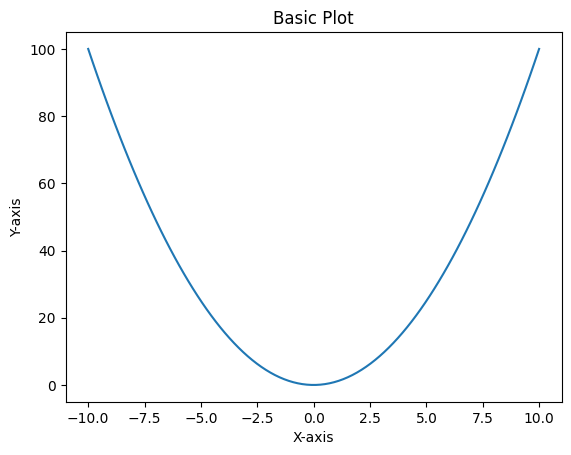

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = x**2

plt.plot(x, y)
plt.title("Basic Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

x = torch.tensor([[1.0], [2.0], [3.0]])
y = torch.tensor([[2.0], [4.0], [6.0]])

for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

print(f"Final loss: {loss.item()}")


Final loss: 0.0609697550535202


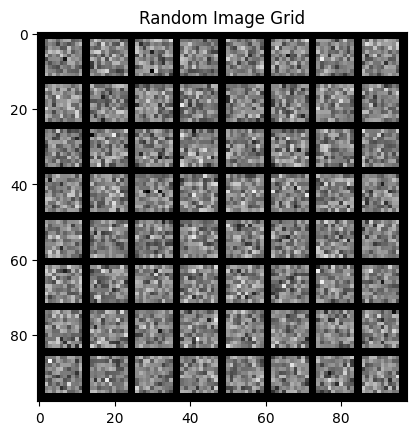

In [3]:
import torch
import torchvision.utils as vutils

noise = torch.randn(64, 100, 1, 1)

grid = vutils.make_grid(noise.view(-1, 1, 10, 10), normalize=True)
plt.imshow(grid.permute(1, 2, 0).detach().numpy())
plt.title("Random Image Grid")
plt.show()


In [4]:
from transformers import GPT2LMHeadModel,GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

input_text = "once upon a time"
input_ids = tokenizer.encode(input_text,return_tensors = 'pt')
output = model.generate(input_ids, max_length=50, num_return_sequences=1)
print(tokenizer.decode(output[0],skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


once upon a time, and I'm not sure if it's a coincidence or not.

I'm not sure if it's a coincidence or not. I'm not sure if it's a coincidence or not. I'm not sure if it


In [5]:
input_text = "once upon a time thre is a cow"
input_ids = tokenizer.encode(input_text,return_tensors = 'pt')
output = model.generate(input_ids, max_length=100, num_return_sequences=1)
print(tokenizer.decode(output[0],skip_special_tokens=False))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


once upon a time thre is a cow, and a man, and a woman, and a man, and a woman, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a man, and a


In [6]:
!pip install langchain-community

In [7]:
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI

template = "Translate the following chat in to french:{text}"
prompt = PromptTemplate(input_variables=['text'],template=template)

llm = OpenAI(model="text-davinci-003")


response = llm(prompt.format(text="Hello,How are you"))
print(response)

<ipython-input-7-96b797474667>:7: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(model="text-davinci-003")


ValidationError: 1 validation error for OpenAI
  Value error, Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. [type=value_error, input_value={'model_kwargs': {}, 'nam...ne, 'http_client': None}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/value_error

In [ ]:
!pip install datasets

In [9]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 29.3 MB/s eta 0:00:00


In [1]:
from transformers import RagTokenizer, RagRetriever, RagSequenceForGeneration

tokenizer = RagTokenizer.from_pretrained("facebook/rag-token-nq")
retriever = RagRetriever.from_pretrained("facebook/rag-token-nq")
model = RagSequenceForGeneration.from_pretrained("facebook/rag-token-nq")

query = "What is the capital of France?"
input_ids = tokenizer(query, return_tensors="pt")["input_ids"]

outputs = model.generate(input_ids)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/models/bart/configuration_bart.py:176: UserWarning: Please make sure the config includes `forced_bos_token_id=0` in future versions. The config can simply be saved and uploaded again to be fixed.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in

OSError: Can't load 'psgs_w100.tsv.pkl'. Make sure that:

- 'https://storage.googleapis.com/huggingface-nlp/datasets/wiki_dpr/' is a correct remote path to a directory containing a file named psgs_w100.tsv.pkl

- or 'https://storage.googleapis.com/huggingface-nlp/datasets/wiki_dpr/' is the correct path to a directory containing a file named psgs_w100.tsv.pkl.



In [5]:
from datasets import load_dataset
from transformers import GPT2Tokenizer, DataCollatorForLanguageModeling,Trainer, TrainingArguments

dataset = load_dataset("wikitext", "wikitext-2-raw-v1")
model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
model.resize_token_embeddings(len(tokenizer))

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["text"])

train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["validation"]

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # Set to False for causal language modeling (CLM)
)


The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Map:   0%|          | 0/4358 [00:00<?, ? examples/s]

Map:   0%|          | 0/36718 [00:00<?, ? examples/s]

Map:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    num_train_epochs=3,
    save_steps=10_000,
    weight_decay=0.01,
    logging_dir="./logs",
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=data_collator,
)


trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 